In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('../df/education.xlsx',header=4)

In [4]:
df['Fipsstr'] = df[df.columns[0]].astype(str)

In [5]:
def get_last_three_letters(xx):
    if len(xx)>3:
        return int(xx[-3:])
    else:
        return np.nan

In [6]:
df['Fipsstr'] = df['Fipsstr'].apply(get_last_three_letters)
df = df.dropna(subset='Fipsstr')

In [7]:
df['Fipsstr'] = df['Fipsstr'].astype(int)

In [8]:
df

,Federal Information Processing Standards (FIPS) Code,State,Area name,2003 Rural-Uban Continuum Code,2003 Urban Influence Code,2013 Rural-Urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Less than a high school diploma, 2016-20","High school diploma only, 2016-20","Some college or associate's degree, 2016-20","Bachelor's degree or higher, 2016-20",total_pop,"Percent of adults with less than a high school diploma, 2016-20","Percent of adults with a high school diploma only, 2016-20","Percent of adults completing some college or associate's degree, 2016-20",Percent of adults with a bachelor's degree or higher 2016-20,Fipsstr
0,51610,VA,Falls Church city,1.0,1.0,1.0,1.0,1523.0,1972.0,1191.0,...,310.0,639.0,1094.0,7751.0,9794,3.165203,6.524403,11.170104,79.140289,610
1,51013,VA,Arlington County,1.0,1.0,1.0,1.0,23454.0,32664.0,17559.0,...,8825.0,13788.0,19573.0,132394.0,174580,5.054989,7.897812,11.211479,75.835716,13
2,35028,NM,Los Alamos County,6.0,5.0,6.0,5.0,942.0,2460.0,1488.0,...,261.0,1341.0,2766.0,9098.0,13466,1.938215,9.958414,20.540621,67.562752,28
3,51510,VA,Alexandria city,1.0,1.0,1.0,1.0,18930.0,17738.0,9173.0,...,8378.0,12364.0,21176.0,78039.0,119957,6.984169,10.307027,17.652992,65.055809,510
4,8013,CO,Boulder County,2.0,2.0,2.0,2.0,15345.0,20226.0,11122.0,...,9647.0,24414.0,45834.0,135876.0,215771,4.470944,11.314774,21.241964,62.972317,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3280,2261,AK,Valdez-Cordova Census Area,9.0,11.0,9.0,11.0,1079.0,973.0,312.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,261
3281,2280,AK,Wrangell-Petersburg Census Area,7.0,11.0,NaN,NaN,1132.0,810.0,305.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,280
3282,30113,MT,Yellowstone National Park,7.0,9.0,NaN,NaN,6.0,14.0,6.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,113
3283,51515,VA,Bedford city,3.0,2.0,2.0,2.0,2106.0,878.0,388.0,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,515


In [9]:
dd = df[np.append(df.columns[1],df.columns[-5:])]

In [11]:
dd = dd.rename(columns={'Fipsstr':'CountyNo'})

In [15]:
dd['BelowUni']= dd[dd.columns[1:3]].sum(axis=1)
dd['AboveUni']= dd[dd.columns[3:5]].sum(axis=1)

<AxesSubplot:>

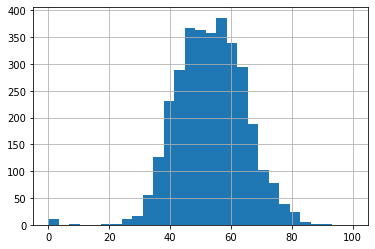

In [20]:
dd['AboveUni'].hist(bins=np.linspace(0,100,30))

In [22]:
dd= dd[[dd.columns[0],dd.columns[-3],dd.columns[-2],dd.columns[-1]]]

In [26]:
dd= dd.rename(columns={'State':'STATE'})

In [27]:
dd.to_csv('../df/EducationCounty.csv')